In [1]:
# Import all dependencies
import os
import cv2
import time
import argparse
import numpy as np
import tensorflow as tf
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from distutils.version import StrictVersion

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')
%matplotlib inline

In [2]:
#Import helper utilities
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import download_data_from_gdrive


/home/ubuntu/obj_detection/models/research/object_detection/utils/visualization_utils.py:27: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py"

Enter the id in the shareable link here:
1FawKnrkELu4Q37wT8oO3neOAGOm7mSqa
Enter the file name with extension here:
2CS8FX-336-14367386_4XH37478AE760_1509054120935.mp4
Download 100%.


In [3]:
os.path.join('../../walmart_obj_detection/w_obj_detection_tracking/training/export/Servo/1546565676/','saved_model.pb')

'../../walmart_obj_detection/w_obj_detection_tracking/training/export/Servo/1546565676/saved_model.pb'

In [4]:
CWD_PATH = os.getcwd()

# Path to frozen detection graph. This is the actual model that is used for the object detection.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
PATH_TO_CKPT = os.path.join('../../walmart_obj_detection/w_obj_detection_tracking/models/faster_rcnn_resnet50_coco_2018_01_28/my_exported_model','frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('../../walmart_obj_detection/w_obj_detection_tracking/training','labelmap.pbtxt')

In [5]:
PATH_TO_CKPT

'../../walmart_obj_detection/w_obj_detection_tracking/models/faster_rcnn_resnet50_coco_2018_01_28/my_exported_model/frozen_inference_graph.pb'

In [6]:
NUM_CLASSES = 3

# Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [7]:
def detect_objects(image_np):
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=20)
    return image_np

In [8]:

# First test on images
PATH_TO_TEST_IMAGES_DIR = '../../walmart_data/train_test/test/data/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'Billy_4_frame_{}.png'.format(i)) for i in [range(100, 104)] ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [9]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    print(im_width)
    print(im_height)
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [10]:
TEST_IMAGE_PATHS

['../../walmart_data/train_test/test/data/Billy_4_frame_range(100, 104).png']

In [11]:
TEST_IMAGE_PATHS=[os.path.join(PATH_TO_TEST_IMAGES_DIR,'Billy_4_frame_00766.png')]

../../walmart_data/train_test/test/data/Billy_4_frame_00766.png
(320, 240, 3)
230400 (320, 240, 3)


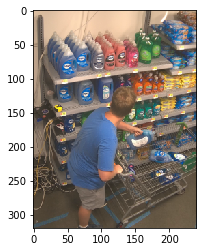

In [12]:
from PIL import Image
for image_path in TEST_IMAGE_PATHS:
    print(image_path)
    im = cv2.imread(image_path)
    print(im.shape)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#     image = Image.open(image_path)
#     image_np = load_image_into_numpy_array(image)
#     plt.imshow(image_np)
    plt.imshow(im_rgb)
    print(im_rgb.size, im_rgb.shape)

In [13]:
#Load a frozen TF model 
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

(320, 240, 3)


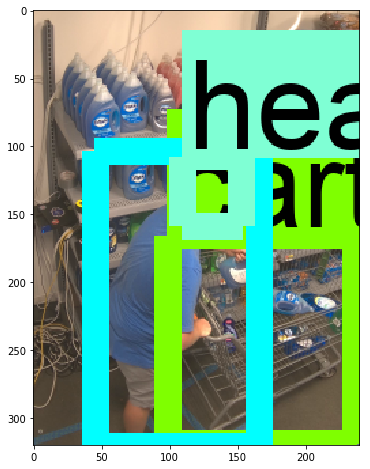

In [14]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
#             image = Image.open(image_path)
#             image_np = load_image_into_numpy_array(image)
            im = cv2.imread(image_path)
            image_np = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            image_process = detect_objects(image_np)
            print(image_process.shape)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_process)

In [15]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import *
from IPython.display import HTML

In [17]:
white_output = 'jody.mp4'
clip1 = VideoFileClip("181016_55.254.1.17_4184test_3.mp4")
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        white_clip = clip1.fl_image(detect_objects) #NOTE: this function expects color images!!s
        %time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video jody.mp4
[MoviePy] Writing video jody.mp4


100%|██████████| 1126/1126 [02:36<00:00, 11.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: jody.mp4 

CPU times: user 1h 4min, sys: 13.2 s, total: 1h 4min 13s
Wall time: 2min 37s


In [18]:
HTML("""
<video width="800" height="600" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [ ]:
HTML("""
<video width="800" height="600" controls>
  <source src="./object_detection/my_test_video/walmart/input/walmart_not_trimmed3.mp4">
</video>
""")